In [1]:
using Pkg; Pkg.activate("/Users/gregorywagner/Projects/OceananigansAnalysis")

using OceananigansAnalysis, NetCDF, Glob, PyPlot, JLD2, Printf

usecmbright()

const noutput = 32;

┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.1/OceananigansAnalysis/lRkHr.ji for OceananigansAnalysis [48a51284-6256-11e9-2134-43d8d96d7f17]
└ @ Base loading.jl:1184


In [8]:
function boundary_layer_viz(filename, noutput; uclip=1, θupperclip=1, θlowerclip=1, ulims=nothing, θlims=nothing, xlims=nothing) 
    
    u, v, w, θ, s = load_solution(filename)
    u′, v′, w′, θ′, s′ = fluctuations(u, v, w, θ, s)
    
    if ulims == nothing
        @show wmax = maximum(abs.(w.data)) 
        ulims = [-1, 1] * uclip*wmax
    end
    
    if θlims == nothing
        @show θmax = maximum(θ′.data) 
        @show θmin = minimum(θ′.data)
        θlims = [θlowerclip*θmin, θupperclip*θmax]
    end
    
    fig, axs = subplots(ncols=3, figsize=(12, 4), sharex=true, sharey=true)

    t = simtime(filename, noutput)
    
    fig.suptitle(@sprintf("\$ t = %.2f \$ hours", t/3600))
    
    makesquare(axs)
    
    if xlims != nothing
        sca(axs[1])
        xlim(xlims[1], xlims[2])
        ylim(-xlims[2], 0)
    end

    for ax in axs
        ax.tick_params(left=false, labelleft=false, bottom=false, labelbottom=false)
    end
    
    axs[1].tick_params(left=true, labelleft=true)

    sca(axs[1])
    title(L"u'")
    xzsliceplot(u′, cmap="RdBu", vmin=ulims[1], vmax=ulims[2])
    
    if xlims != nothing
        sca(axs[1])
        xlim(xlims[1], xlims[2])
        ylim(-xlims[2], 0)
    end

    sca(axs[2])
    title(L"w")
    xzsliceplot(w, cmap="RdBu_r", vmin=ulims[1], vmax=ulims[2])

    sca(axs[3])
    title(L"\theta'")
    xzsliceplot(θ′, cmap="RdBu_r", vmin=θlims[1], vmax=θlims[2])
end

boundary_layer_viz (generic function with 1 method)

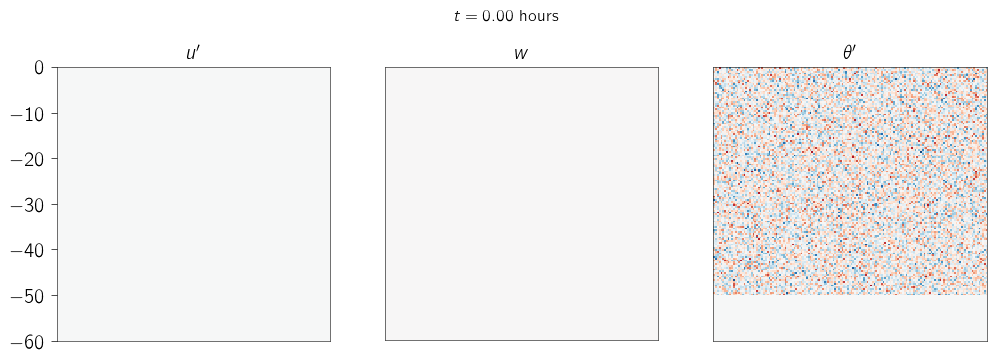

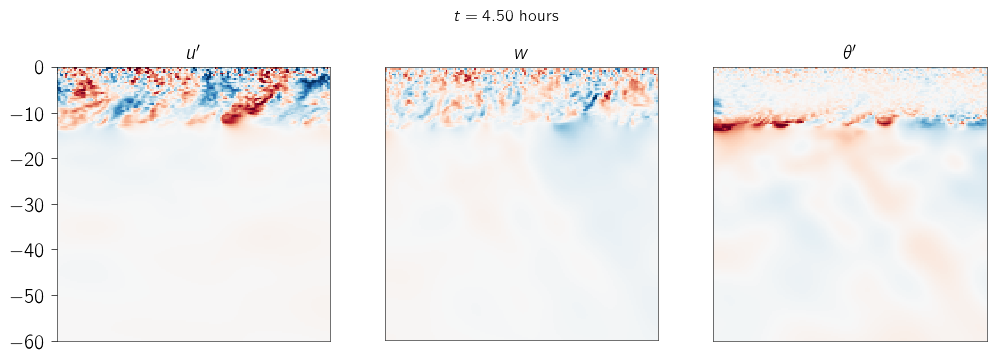

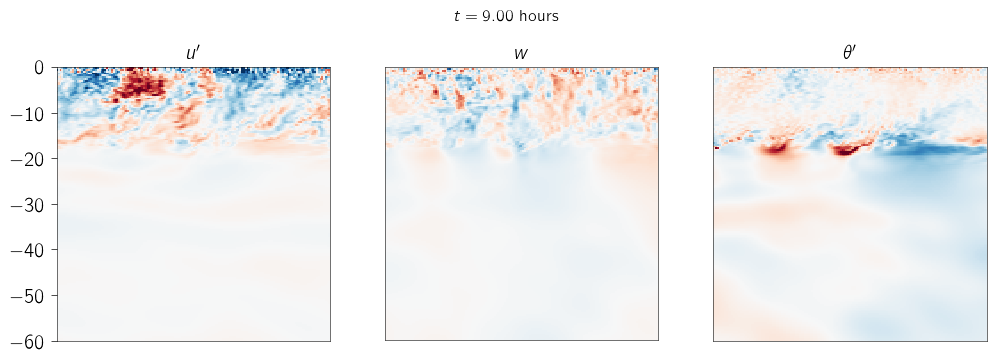

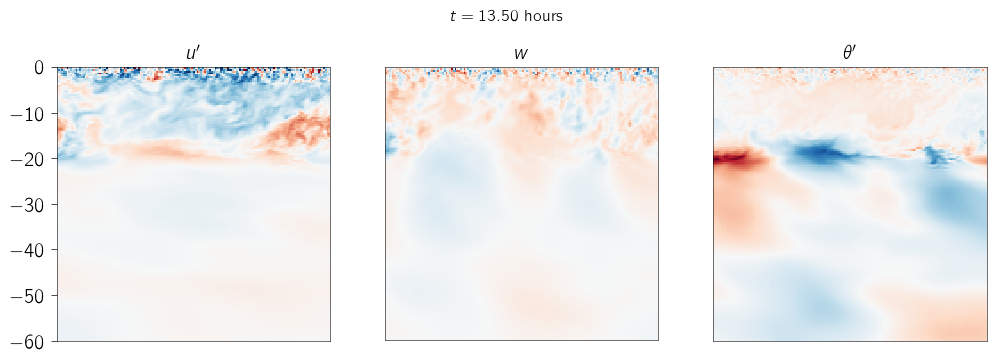

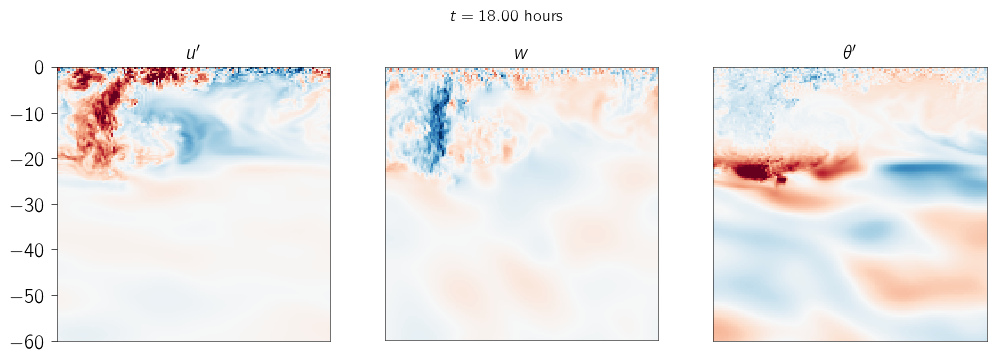

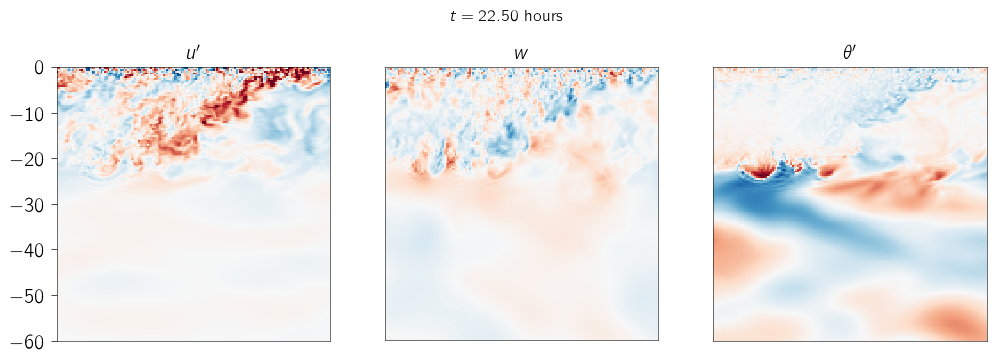

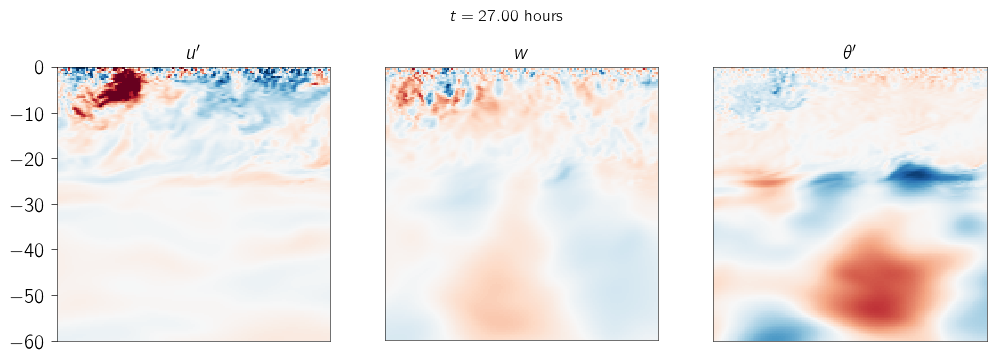

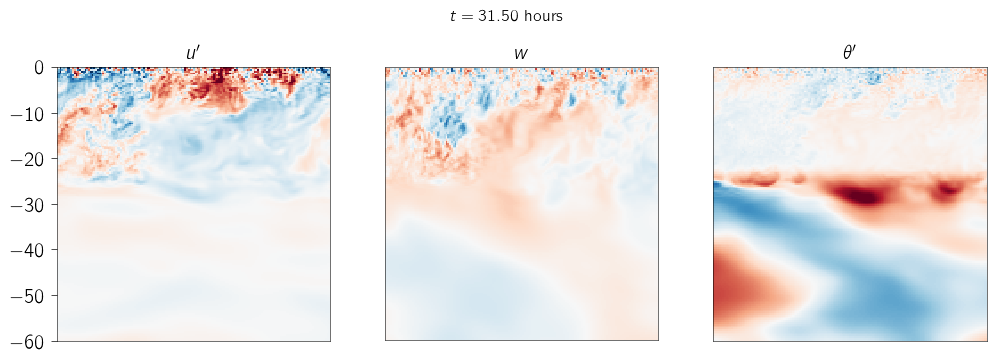

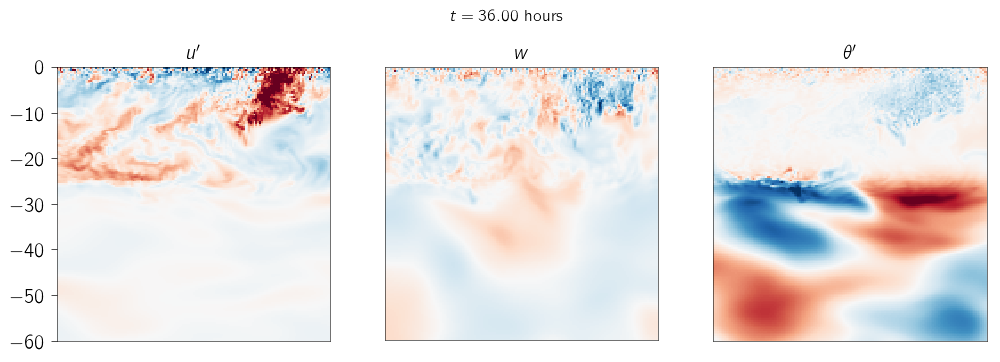

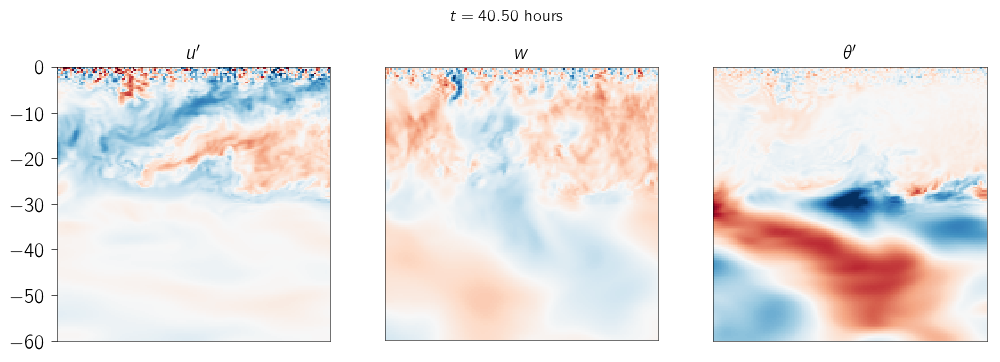

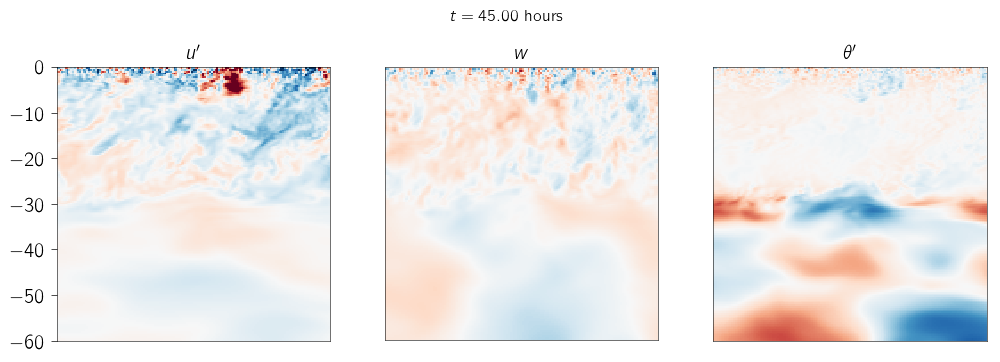

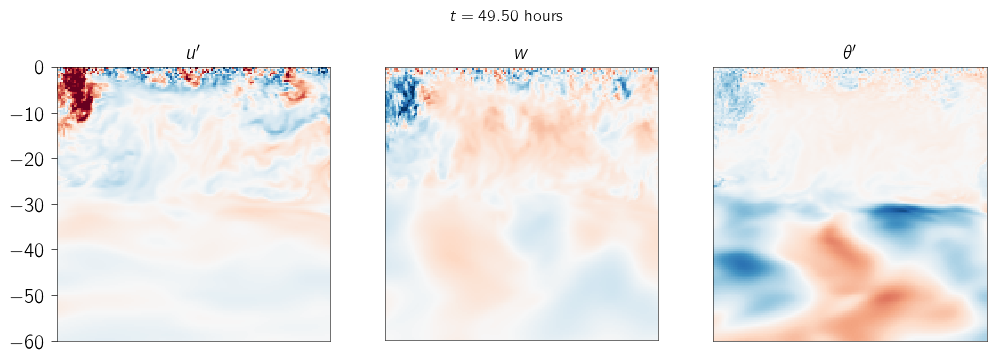

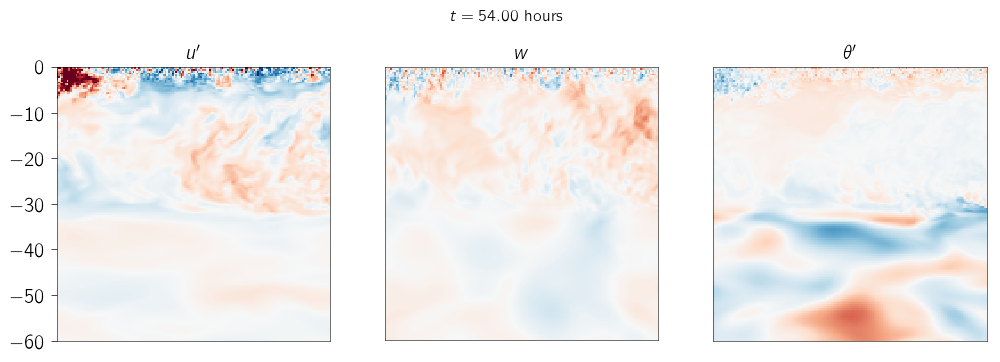

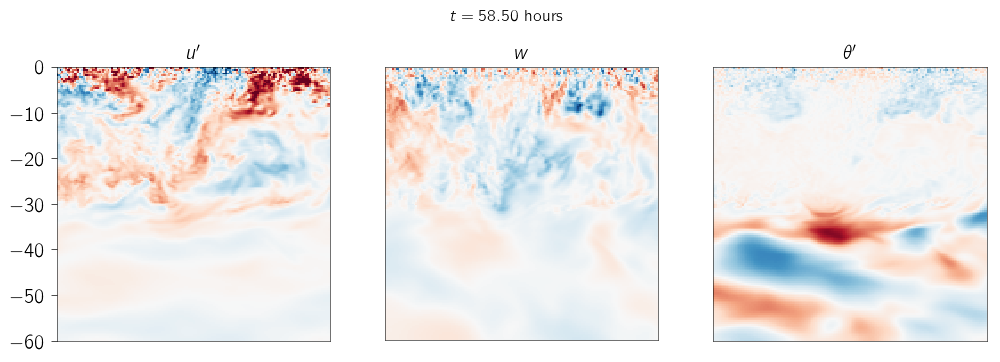

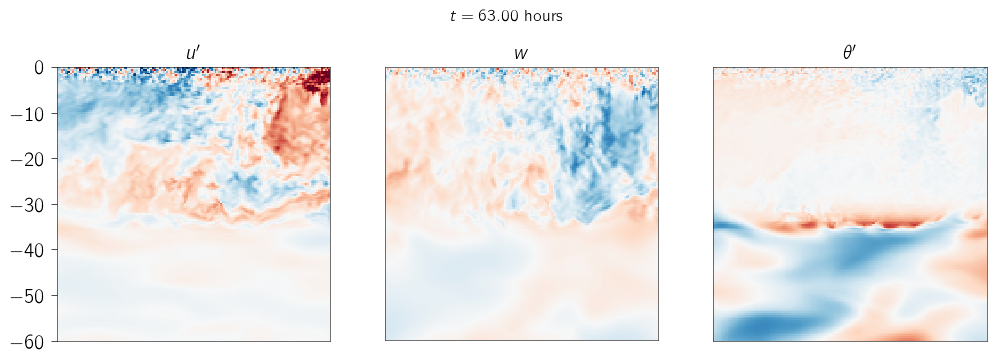

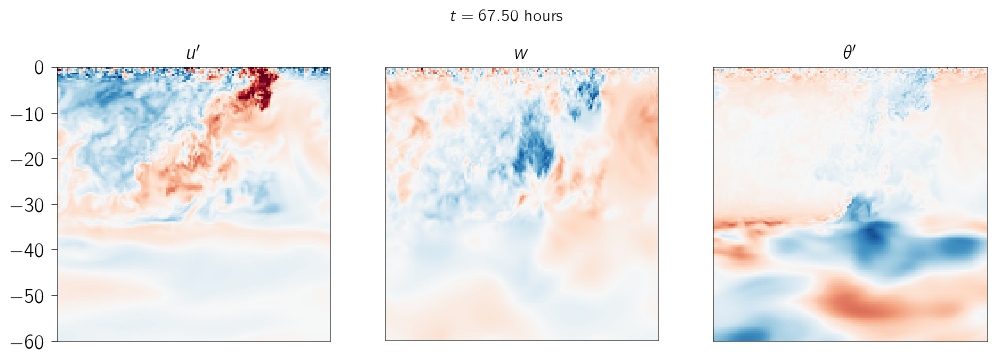

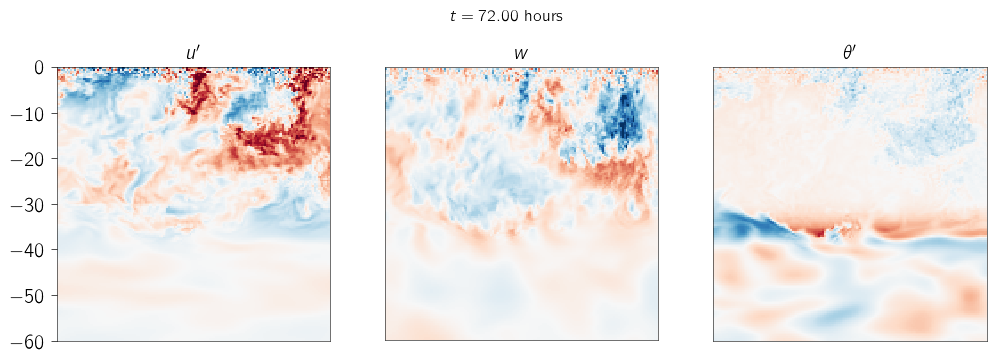

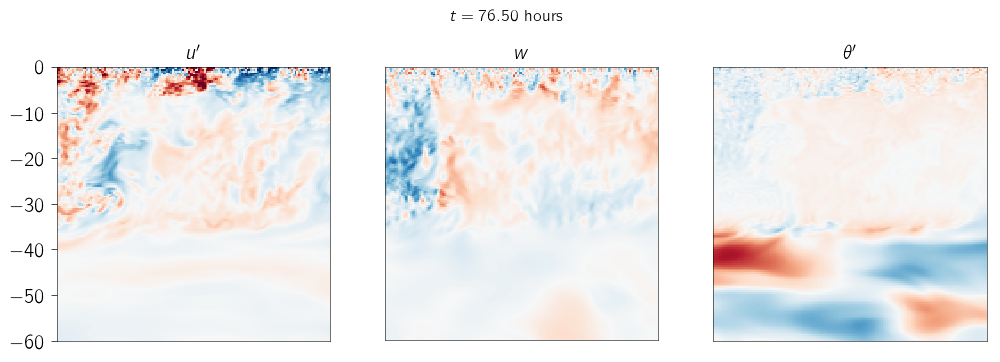

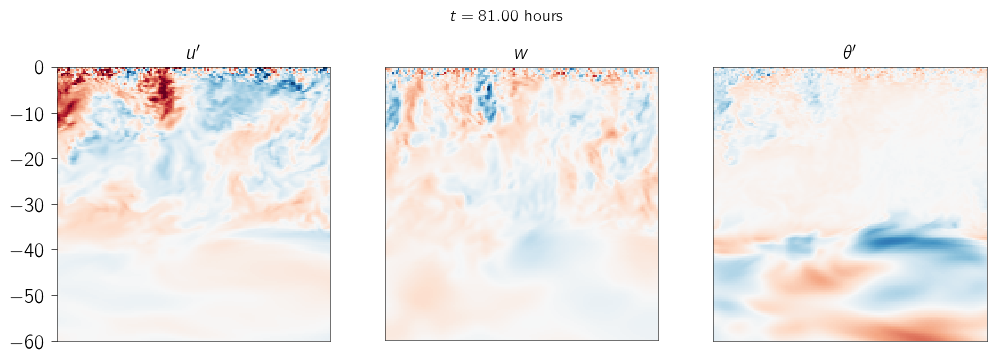

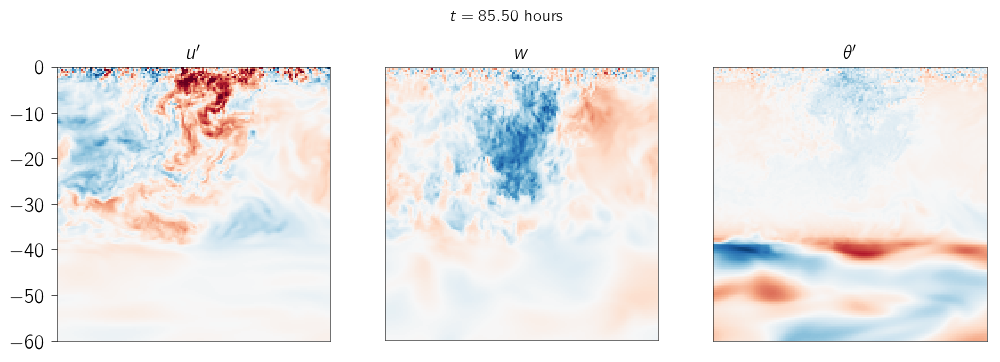

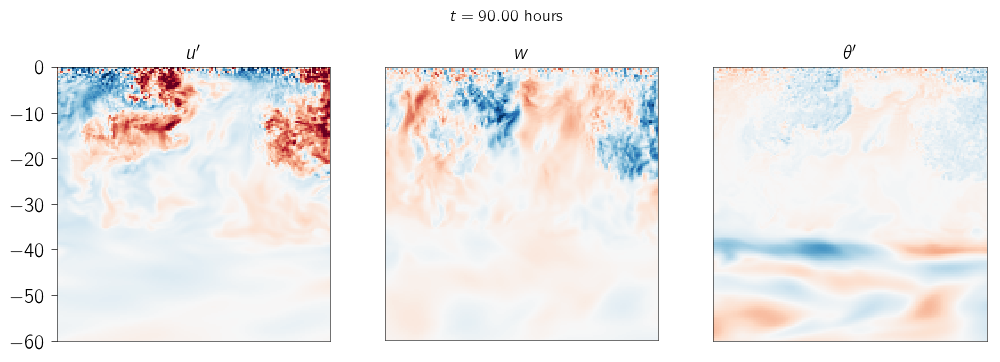

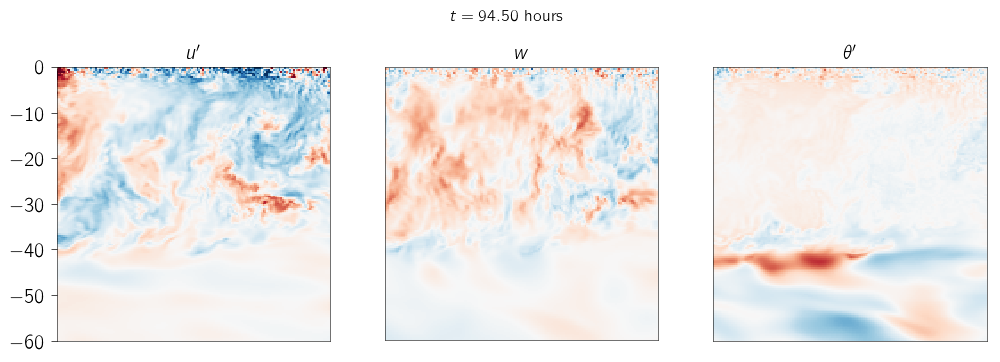

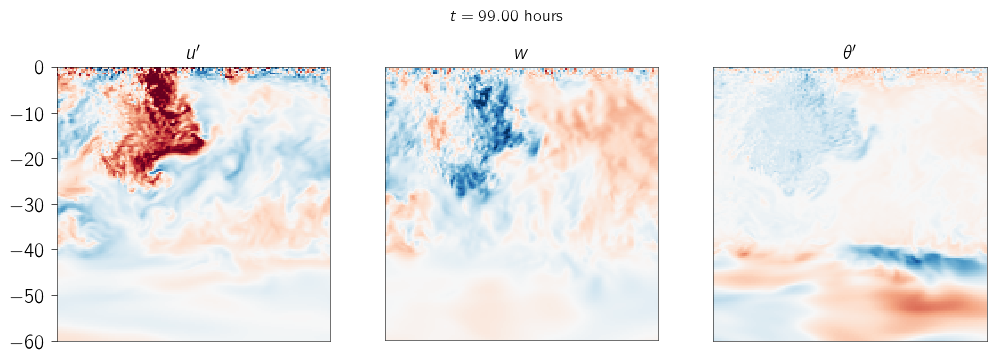

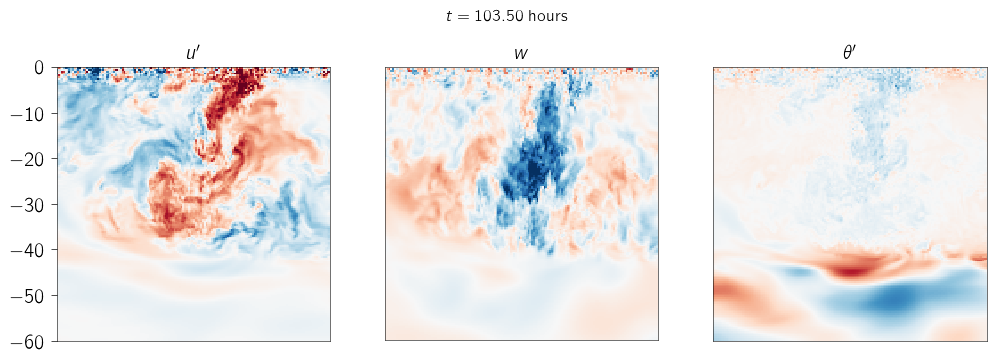

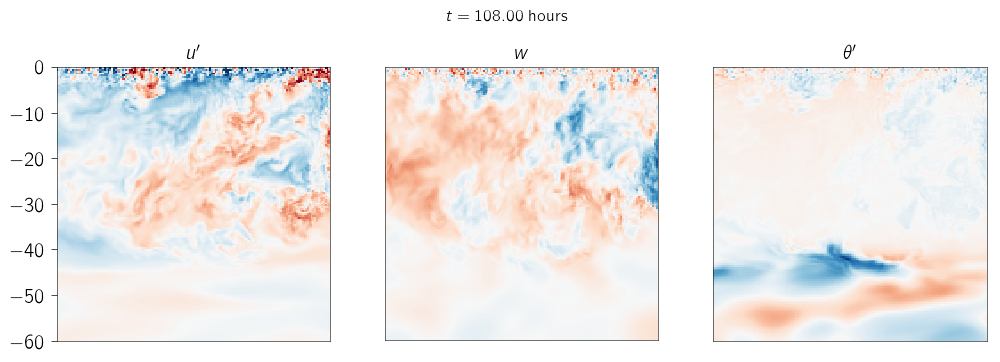

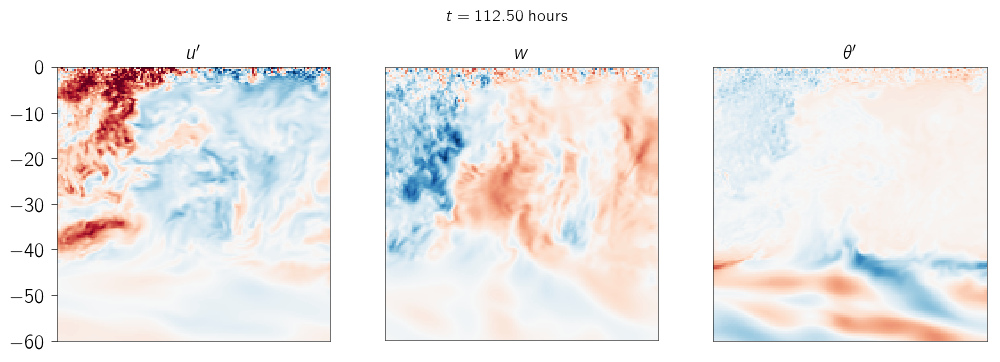

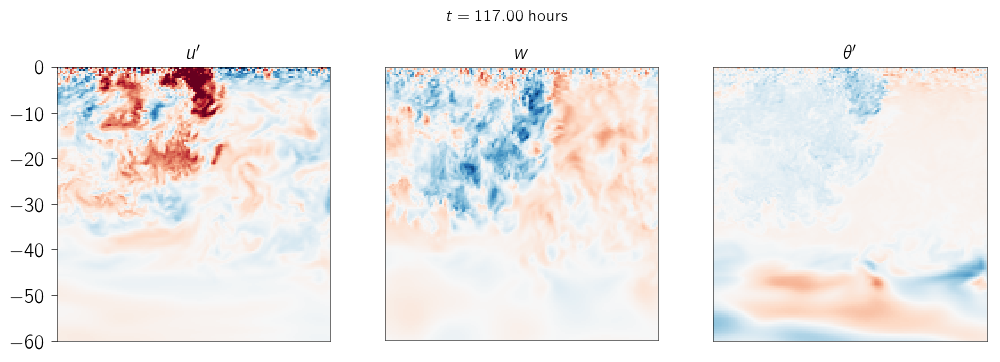

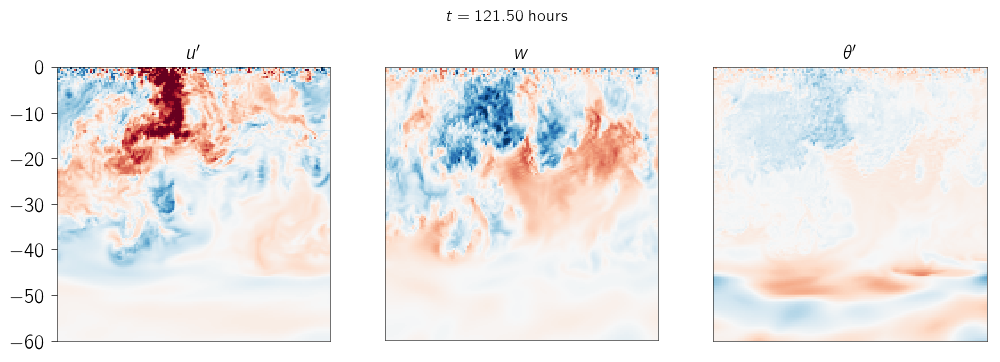

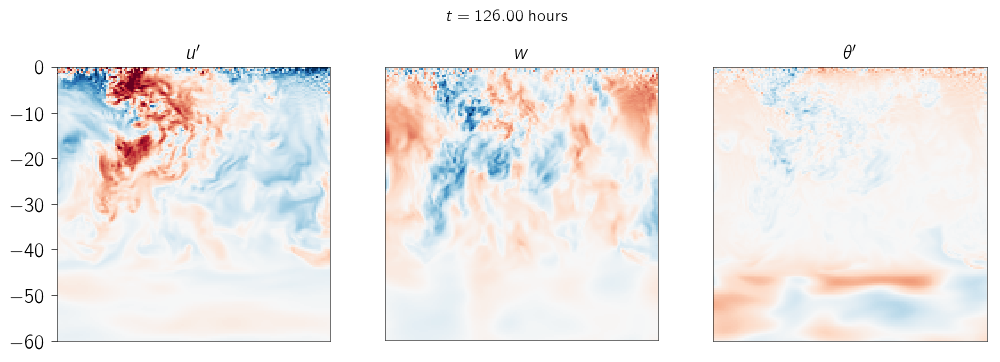

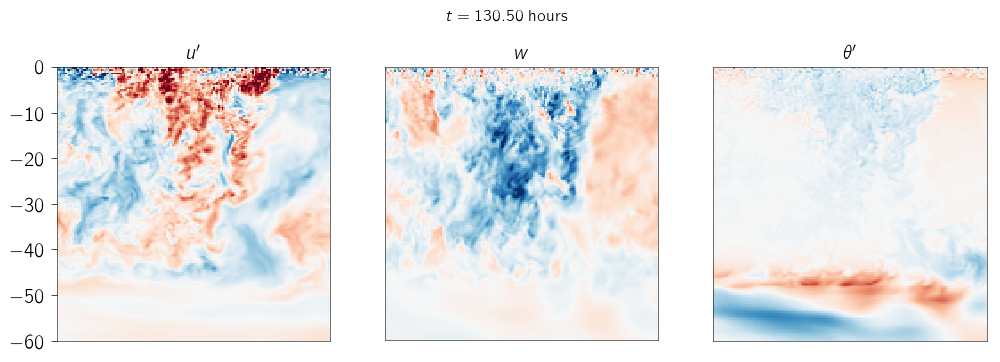

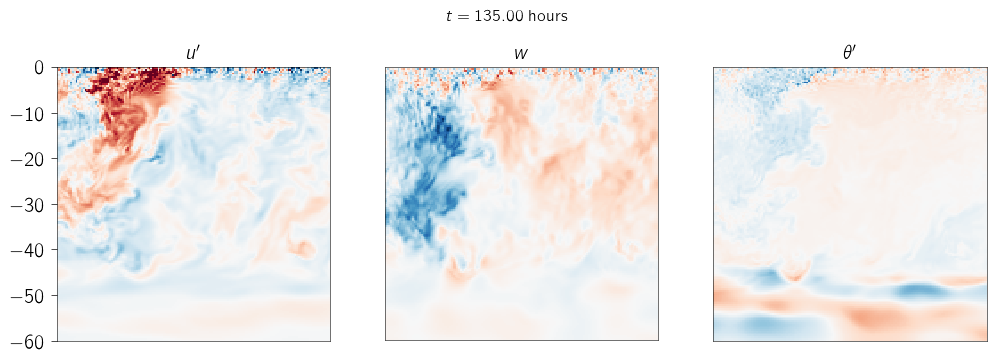

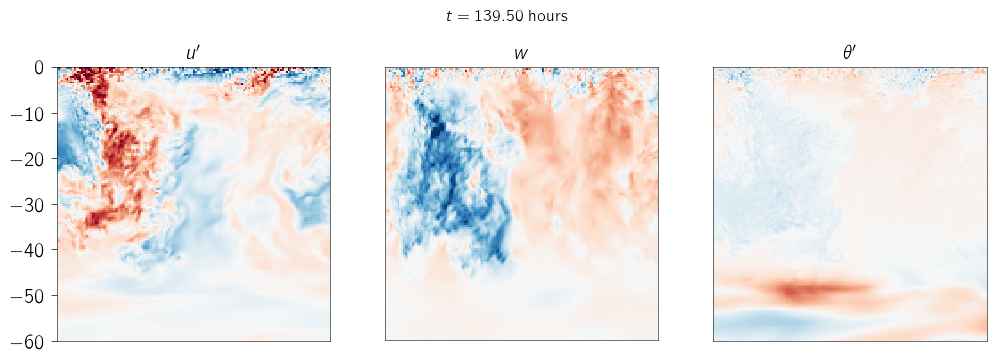

In [7]:
sortedpaths = sort_paths(glob("wind_stress" * "*.nc", "."))

for i = 1:length(sortedpaths)
    boundary_layer_viz(sortedpaths[i], noutput; ulims=[-1, 1]*0.03, θlims=[-1, 1]*0.04, xlims=[0, 60])
    name = name_without_num(sortedpaths[i]) * "_$i.png"
    savefig(name, dpi=960)
end